# NETFLIX CONTENT STRATEGY ANALYSIS

## Data Analysis

In [1]:
# Import the necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [2]:
df = pd.read_csv("C:/Users/hp\Desktop/Data Analysis/Datasets/netflix_content_2023.csv")

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_14564\815488962.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:/Users/hp\Desktop/Data Analysis/Datasets/netflix_content_2023.csv")


,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [3]:
# Clean the 'Hours Viewed' Column to Prepare It for Analysis by Converting it to Numeric and remove the commas
df['Hours Viewed'] = pd.to_numeric(df['Hours Viewed'].str.replace(',', ''), errors='coerce')

# Also Convert the Release Date Column to Date Format
df['Release Date'] = pd.to_datetime(df['Release Date'], format='%Y-%m-%d')

In [4]:
#Check
df.dtypes

Title                          object
Available Globally?            object
Release Date           datetime64[ns]
Hours Viewed                    int64
Language Indicator             object
Content Type                   object
dtype: object

In [5]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,English,Movie


In [6]:
df.shape

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  int64         
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.1+ MB


Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

### Viewership by Content

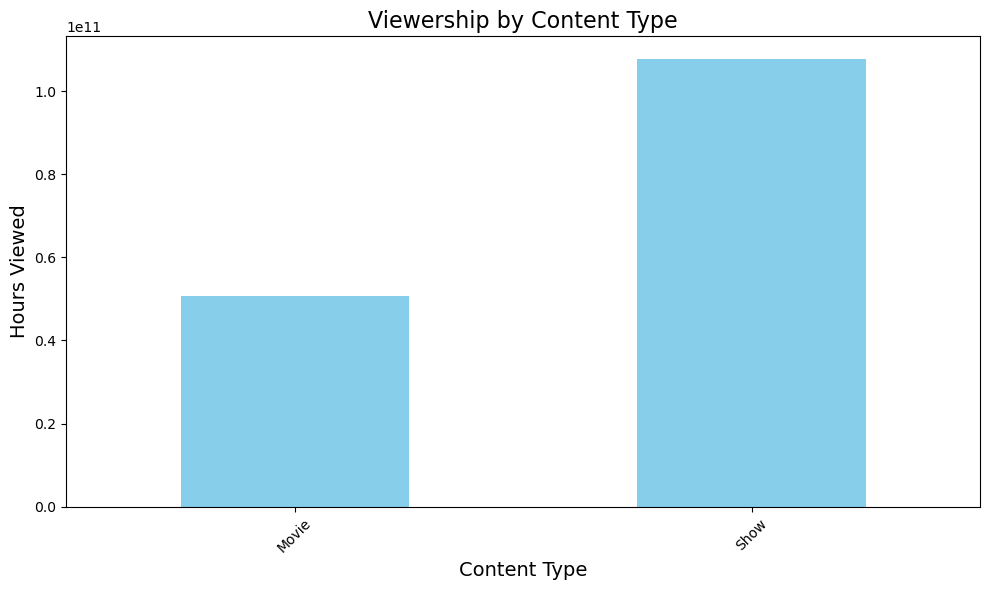

In [7]:
# aggregate viewership hours by content type
content_type_viewership = df.groupby('Content Type')['Hours Viewed'].sum()

# Plot using matplotlib
plt.figure(figsize=(10,6))
content_type_viewership.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Viewership by Content Type', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Hours Viewed', fontsize=14)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Viewership by Language Group

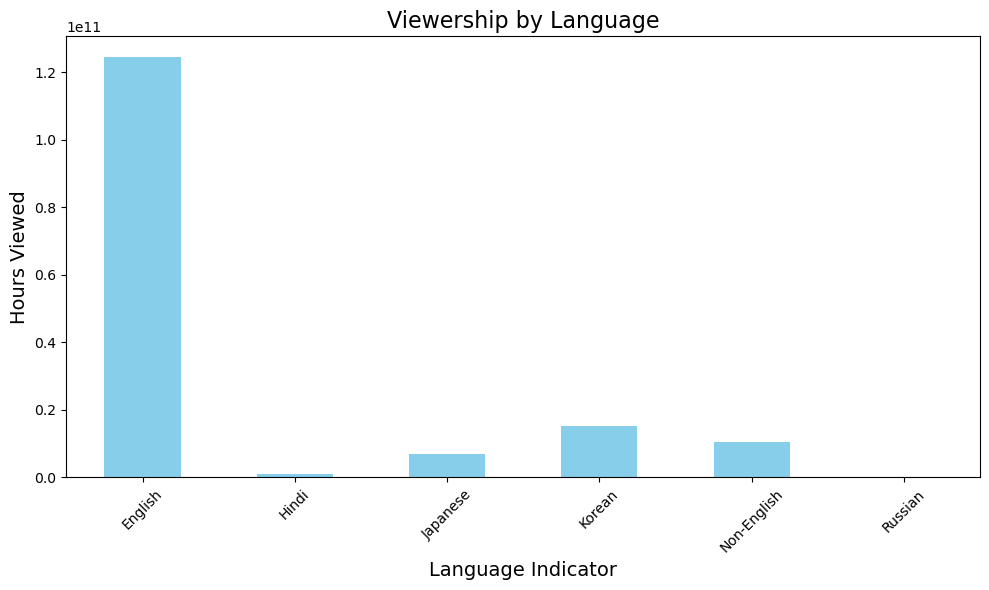

In [9]:
# aggregate viewership hours by content type
language_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum()

# Plot using matplotlib
plt.figure(figsize=(10,6))
language_viewership.plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Viewership by Language', fontsize=16)
plt.xlabel('Language Indicator', fontsize=14)
plt.ylabel('Hours Viewed', fontsize=14)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Viewership by Month

Text(0, 0.5, 'Hours Viewed')

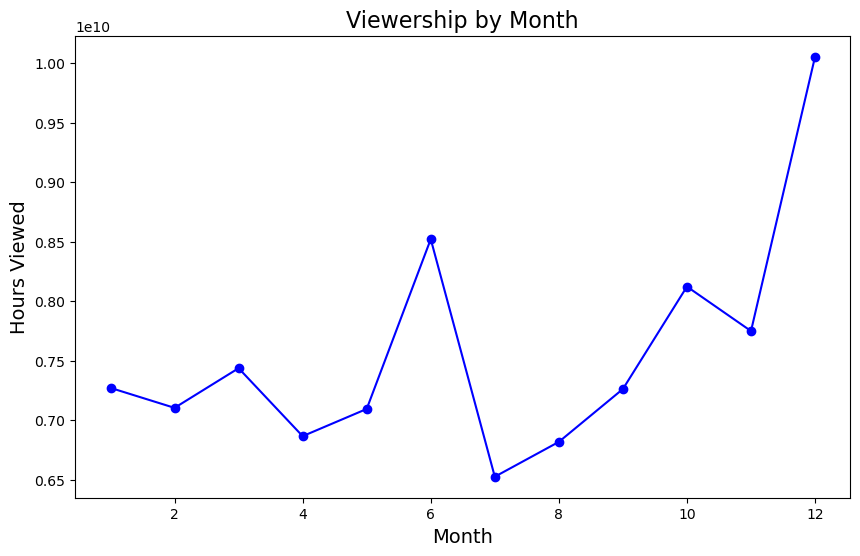

In [10]:
# Extract the month from the 'Release Date'
df['Month'] = df['Release Date'].dt.month

# Group by month and calculate the total 'Hours Viewed'
viewership_by_month = df.groupby('Month')['Hours Viewed'].sum()

# Plot the viewership by month using a line graph
plt.figure(figsize=(10,6))
plt.plot(viewership_by_month.index, viewership_by_month.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Viewership by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Hours Viewed', fontsize=14)


### Most Successful Content

In [11]:
# extract the top 5 titles based on viewership hours
top_5 = df.nlargest(5, 'Hours Viewed')

top_5[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000,English,Show,2023-08-31


### Viewership Trends by Content Type

In [12]:
# Group by 'Content Type' and 'Month' and aggregate the 'Hours Viewed'
content_type_monthly_viewership = df.groupby(['Content Type', 'Month'])['Hours Viewed'].sum().reset_index()

content_type_monthly_viewership

,Content Type,Month,Hours Viewed
0,Movie,1.0,2275900000
1,Movie,2.0,1654400000
2,Movie,3.0,2109400000
3,Movie,4.0,2757600000
4,Movie,5.0,2520500000
5,Movie,6.0,3135800000
6,Movie,7.0,1615700000
7,Movie,8.0,2186400000
8,Movie,9.0,2092300000
9,Movie,10.0,3400400000


In [13]:
# Pivot the result to see each content type as a row and each month as a column
pivot_table = content_type_monthly_viewership.pivot_table(index='Content Type', columns='Month', values='Hours Viewed', fill_value=0)

# Display the pivot table
print(pivot_table)

Month                 1.0           2.0           3.0           4.0   \
Content Type                                                           
Movie         2.275900e+09  1.654400e+09  2.109400e+09  2.757600e+09   
Show          4.995700e+09  5.449300e+09  5.327700e+09  4.108100e+09   

Month                 5.0           6.0           7.0           8.0   \
Content Type                                                           
Movie         2.520500e+09  3.135800e+09  1.615700e+09  2.186400e+09   
Show          4.574100e+09  5.386200e+09  4.909100e+09  4.631400e+09   

Month                 9.0           10.0          11.0          12.0  
Content Type                                                          
Movie         2.092300e+09  3.400400e+09  1.866900e+09  2.554900e+09  
Show          5.169900e+09  4.722800e+09  5.882600e+09  7.500900e+09  


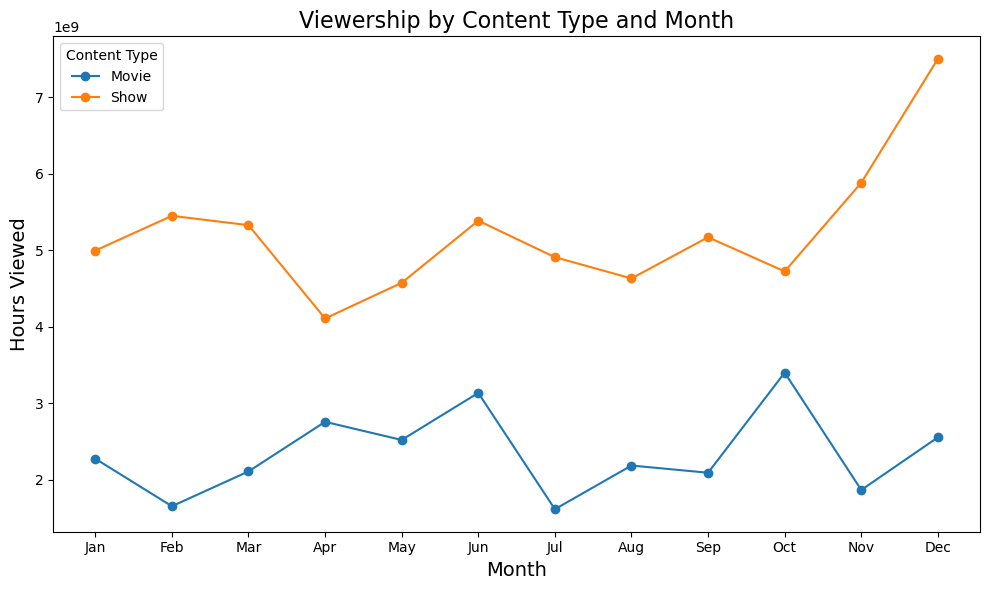

In [14]:
# Plot the viewership by content type and month
plt.figure(figsize=(10,6))
for content_type in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[content_type], marker='o', label=content_type)

# Add labels and title
plt.title('Viewership by Content Type and Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Hours Viewed', fontsize=14)

# Set custom month names for the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names)

# Add legend
plt.legend(title='Content Type')

# Display the plot
plt.tight_layout()
plt.show()

### Viewership Hours Across Different Seasons

In [22]:
# Define the function to map months to seasons (it expects integers)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    return None

# Step 3: Apply the function to the 'Month' column
# Ensure the 'Month' column is numeric (this should avoid the error)
df['Season'] = df['Month'].apply(get_season)

# Step 4: Group by 'Content Type' and 'Season' and aggregate the 'Hours Viewed'
viewership_by_season = df.groupby(['Content Type', 'Season'])['Hours Viewed'].sum().reset_index()

# Display the result
viewership_by_season

,Content Type,Season,Hours Viewed
0,Movie,Autumn,7359600000
1,Movie,Spring,7387500000
2,Movie,Summer,6937900000
3,Movie,Winter,6485200000
4,Show,Autumn,15775300000
5,Show,Spring,14009900000
6,Show,Summer,14926700000
7,Show,Winter,17945900000


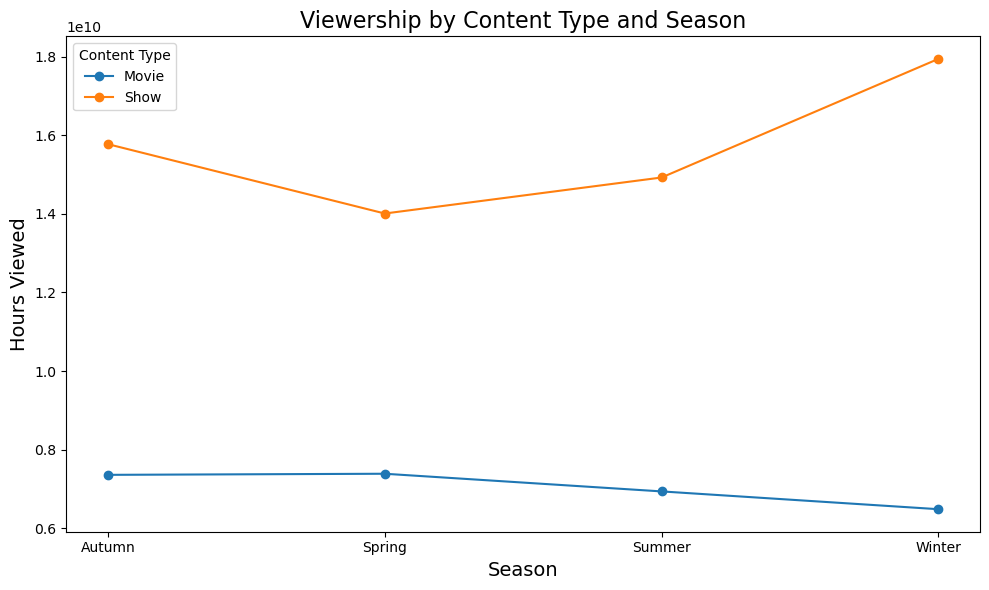

In [24]:
# Pivot the data to have seasons as columns and content types as rows
pivot_table_season = viewership_by_season.pivot_table(index='Content Type', columns='Season', values='Hours Viewed', fill_value=0)

# Plot the viewership by content type and season
plt.figure(figsize=(10,6))
for content_type in pivot_table_season.index:
    plt.plot(pivot_table_season.columns, pivot_table_season.loc[content_type], marker='o', label=content_type)

# Add labels and title
plt.title('Viewership by Content Type and Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Hours Viewed', fontsize=14)

# Add legend and display the plot
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

### Content Releases and Viewership Hours Across Months

In [25]:
# Count the number of content releases per month
content_releases_per_month = df.groupby('Month')['Content Type'].count()

# Sum the 'Hours Viewed' per month
viewership_hours_per_month = df.groupby('Month')['Hours Viewed'].sum()

# Combine the results into a single DataFrame
monthly_stats = pd.DataFrame({
    'Content Releases': content_releases_per_month,
    'Viewership Hours': viewership_hours_per_month
}).reset_index()

# Display the DataFrame
print(monthly_stats)

    Month  Content Releases  Viewership Hours
0     1.0               608        7271600000
1     2.0               560        7103700000
2     3.0               690        7437100000
3     4.0               647        6865700000
4     5.0               624        7094600000
5     6.0               670        8522000000
6     7.0               631        6524800000
7     8.0               674        6817800000
8     9.0               739        7262200000
9    10.0               802        8123200000
10   11.0               734        7749500000
11   12.0               787       10055800000


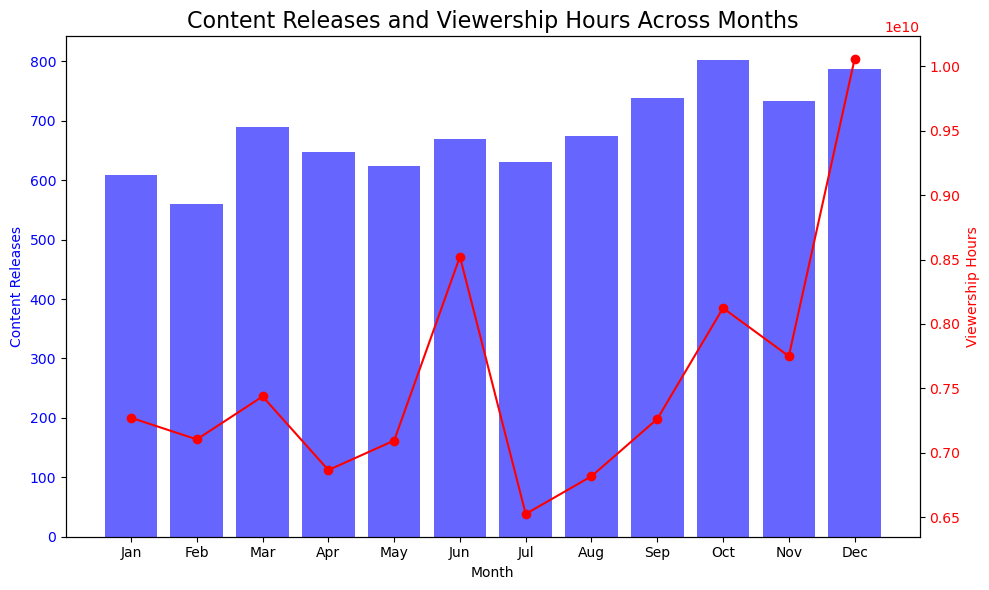

In [26]:
# Plot content releases and viewership hours across months
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot content releases as bars
ax1.bar(monthly_stats['Month'], monthly_stats['Content Releases'], color='b', alpha=0.6, label='Content Releases')
ax1.set_xlabel('Month')
ax1.set_ylabel('Content Releases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set custom month names for the x-axis
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_names)

# Create a second y-axis for viewership hours
ax2 = ax1.twinx()
ax2.plot(monthly_stats['Month'], monthly_stats['Viewership Hours'], color='r', marker='o', label='Viewership Hours')
ax2.set_ylabel('Viewership Hours', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title
plt.title('Content Releases and Viewership Hours Across Months', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


### Content Releases and Viewership Across Days of the Week

In [29]:
# Extract the day of the week
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Drop rows where 'Release Date' could not be converted
df.dropna(subset=['Release Date'], inplace=True)

# Extract day of the week
df['Day of Week'] = df['Release Date'].dt.dayofweek  # Monday=0, Sunday=6

# Count the number of content releases per day of the week
content_releases_per_day = df.groupby('Day of Week')['Content Type'].count()

# Sum the 'Hours Viewed' per day of the week
viewership_hours_per_day = df.groupby('Day of Week')['Hours Viewed'].sum()

# Combine the results into a single DataFrame
weekly_stats = pd.DataFrame({
    'Content Releases': content_releases_per_day,
    'Viewership Hours': viewership_hours_per_day
}).reset_index()

# Step 5: Convert numerical day of week to labels
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_stats['Day of Week'] = weekly_stats['Day of Week'].astype(int).apply(lambda x: day_names[x])

# Display the DataFrame
print(weekly_stats)

  Day of Week  Content Releases  Viewership Hours
0      Monday               436        3954500000
1     Tuesday               995        5562300000
2   Wednesday              1310       15744100000
3    Thursday              1145       20292800000
4      Friday              3863       38217200000
5    Saturday               238        5121800000
6      Sunday               179        1935300000


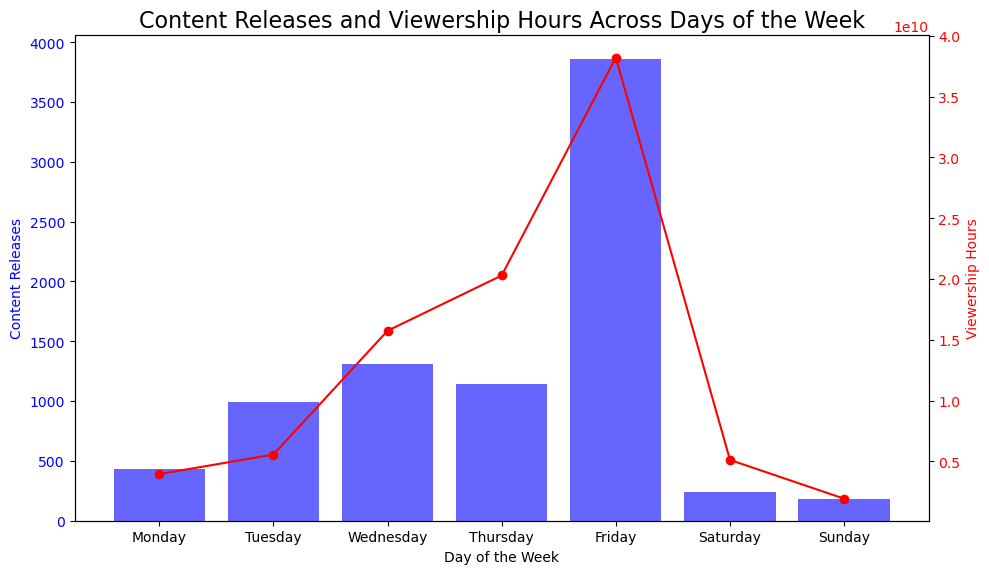

In [30]:
# Plot content releases and viewership hours across days of the week
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot content releases as bars
ax1.bar(weekly_stats['Day of Week'], weekly_stats['Content Releases'], color='b', alpha=0.6, label='Content Releases')
ax1.set_xlabel('Day of the Week')
ax1.set_ylabel('Content Releases', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for viewership hours
ax2 = ax1.twinx()
ax2.plot(weekly_stats['Day of Week'], weekly_stats['Viewership Hours'], color='r', marker='o', label='Viewership Hours')
ax2.set_ylabel('Viewership Hours', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title
plt.title('Content Releases and Viewership Hours Across Days of the Week', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


### Viewership on High-Impact Dates

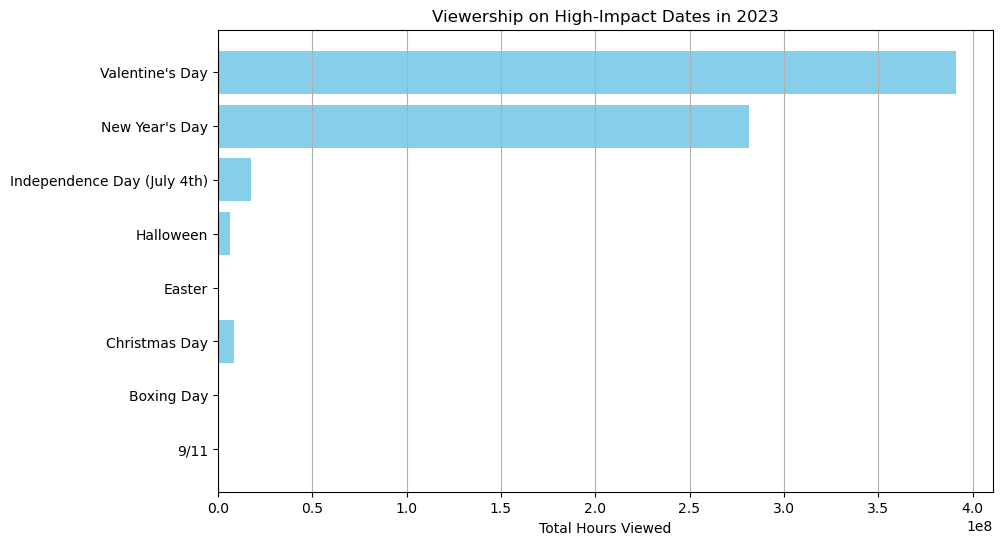

In [31]:
# Define high-impact dates
high_impact_dates = {
    'New Year\'s Day': '2023-01-01',
    'Christmas Day': '2023-12-25',
    'Boxing Day': '2023-12-26',
    'Independence Day (July 4th)': '2023-07-04',
    'Easter': '2023-04-09',  # Easter Sunday 2023
    'Halloween': '2023-10-31',
    'Valentine\'s Day': '2023-02-14',
    '9/11': '2023-09-11'
}

# Create a DataFrame for high-impact dates
impact_dates_df = pd.DataFrame(list(high_impact_dates.items()), columns=['Event', 'Date'])
impact_dates_df['Date'] = pd.to_datetime(impact_dates_df['Date'])

# Merge with the original DataFrame to get viewership hours
viewership_on_impact_dates = impact_dates_df.merge(
    df[['Release Date', 'Hours Viewed']], 
    left_on='Date', 
    right_on='Release Date', 
    how='left'
)

# Aggregate viewership hours
viewership_on_impact_dates['Hours Viewed'] = viewership_on_impact_dates['Hours Viewed'].fillna(0)
viewership_on_impact_summary = viewership_on_impact_dates.groupby('Event')['Hours Viewed'].sum().reset_index()

# Visualise the results
plt.figure(figsize=(10, 6))
plt.barh(viewership_on_impact_summary['Event'], viewership_on_impact_summary['Hours Viewed'], color='skyblue')
plt.xlabel('Total Hours Viewed')
plt.title('Viewership on High-Impact Dates in 2023')
plt.grid(axis='x')
plt.show()

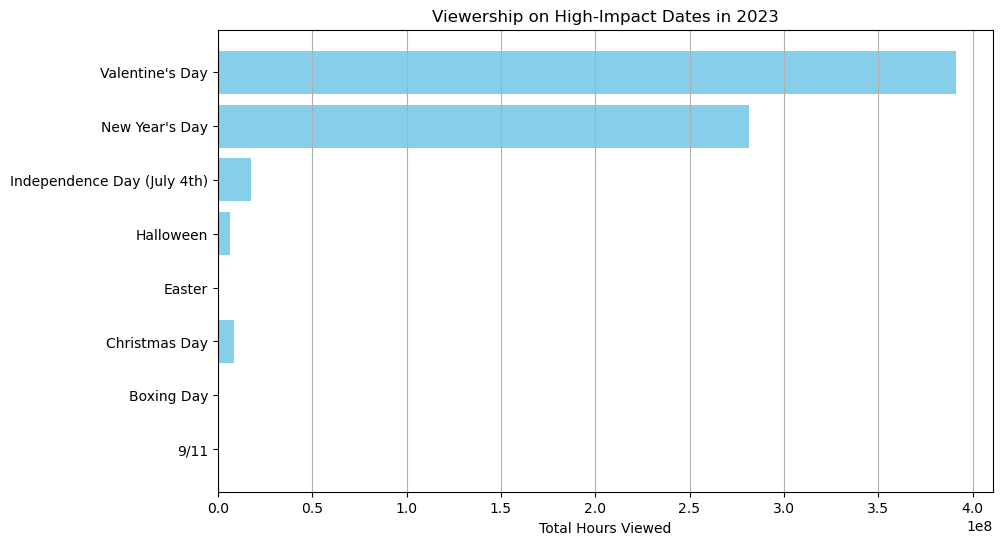

Most Viewed Titles During High-Impact Dates:


,Event,Title,Hours Viewed
0,Christmas Day,Ricky Gervais: Armageddon,8400000.0
2,Halloween,Ralph Barbosa: Cowabunga,4600000.0
4,Independence Day (July 4th),Tom Segura: Sledgehammer,12200000.0
5,New Year's Day,Kaleidoscope: Limited Series,274800000.0
12,Valentine's Day,Perfect Match: Season 1,203600000.0


In [37]:
# Define high-impact dates
high_impact_dates = {
    'New Year\'s Day': '2023-01-01',
    'Christmas Day': '2023-12-25',
    'Boxing Day': '2023-12-26',
    'Independence Day (July 4th)': '2023-07-04',
    'Easter': '2023-04-09',  # Easter Sunday 2023
    'Halloween': '2023-10-31',
    'Valentine\'s Day': '2023-02-14',
    '9/11': '2023-09-11'
}

# Step 3: Create a DataFrame for high-impact dates
impact_dates_df = pd.DataFrame(list(high_impact_dates.items()), columns=['Event', 'Date'])
impact_dates_df['Date'] = pd.to_datetime(impact_dates_df['Date'])

# Step 4: Merge with the original DataFrame to get viewership hours and content
viewership_on_impact_dates = impact_dates_df.merge(
    df[['Release Date', 'Hours Viewed', 'Title']],  # Use 'Title' for the actual titles
    left_on='Date', 
    right_on='Release Date', 
    how='left'
)

# Step 5: Fill NaN hours viewed with 0
viewership_on_impact_dates['Hours Viewed'] = viewership_on_impact_dates['Hours Viewed'].fillna(0)

# Step 6: Aggregate viewership hours
viewership_on_impact_summary = viewership_on_impact_dates.groupby('Event')['Hours Viewed'].sum().reset_index()

# Step 7: Find the content with the most viewership for each event
most_viewed_content = viewership_on_impact_dates.loc[
    viewership_on_impact_dates.groupby('Event')['Hours Viewed'].idxmax(), 
    ['Event', 'Title', 'Hours Viewed']
]

# Step 8: Find all content viewed on high-impact dates
content_per_event = viewership_on_impact_dates.groupby(['Event', 'Title'])['Hours Viewed'].sum().reset_index()

# Step 9: Sort to get the most viewed content for each event
most_viewed_per_event = content_per_event.loc[content_per_event.groupby('Event')['Hours Viewed'].idxmax()]

# Step 10: Visualise the total hours viewed
plt.figure(figsize=(10, 6))
plt.barh(viewership_on_impact_summary['Event'], viewership_on_impact_summary['Hours Viewed'], color='skyblue')
plt.xlabel('Total Hours Viewed')
plt.title('Viewership on High-Impact Dates in 2023')
plt.grid(axis='x')
plt.show()

# Display the most viewed titles during high-impact dates
print("Most Viewed Titles During High-Impact Dates:")
most_viewed_per_event


## Conclusion